Mounted at /content/drive


2. Subir el archivo .zip y descomprimirlo en la MV

In [ ]:
!unzip "/content/Datos.zip" -d "/content/Datos/"
base_dir = '/content/Datos'

Archive:  /content/Datos.zip
replace /content/Datos/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Covid
error:  invalid response [Covid]
replace /content/Datos/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Covid2
error:  invalid response [Covid2]
replace /content/Datos/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Covid3
error:  invalid response [Covid3]
replace /content/Datos/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Datos.zip
error:  invalid response [Datos.zip]
replace /content/Datos/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: error:  invalid response [{ENTER}]
replace /content/Datos/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace /content/Datos/DLAI3_CXR_Validation_Set/DLAI3_Val_Set1 (1).jpg? 

B) Importamos las librerías necesarias
Cargamos las librerías Sequential para la configuración de la red formada por capas de convolución y max pooling 2D, capas droptout y capas flatten y dense.

In [ ]:
import os

for root, dirs, files in os.walk("/content/Datos"):
    print(root)

/content/Datos
/content/Datos/DLAI3_CXR_Validation_Set
/content/Datos/mini-dataset
/content/Datos/mini-dataset/dataset
/content/Datos/mini-dataset/dataset/normal
/content/Datos/mini-dataset/dataset/covid
/content/Datos/datasets
/content/Datos/datasets/datasets
/content/Datos/datasets/datasets/train
/content/Datos/datasets/datasets/train/positive
/content/Datos/datasets/datasets/train/negative
/content/Datos/datasets/datasets/test
/content/Datos/datasets/datasets/test/positive
/content/Datos/datasets/datasets/test/negative


In [ ]:
from tensorflow.keras.models import Sequential # Modelo/clase sobre la que contruirmos las capas de la red
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
# Conv2D -> para la detección de bordes y definición (nitidez) de la imagen
# Pooling -> reduce el tamaño de los datos, la dimensionalidad de la imagen
# Dropout -> controla el sobreajuste del modelo
# Flatten -> transforma la materiz de caracterísitcas en un vector 1D
# Dense conecta el vector de características con el vector de datos de entradas, predicciones de las etiquetas
from tensorflow.keras.optimizers import Adam
# Emplearemos Adam como optimizador
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Nos permite realizar tareas de aumento de datos
import numpy as np
import matplotlib.pyplot as plt

print("\n - A) Importamos las librerías necesarioas\n")


 - A) Importamos las librerías necesarioas



In [37]:
# Definimos las rutas a las carpetas con las imágenes de entrenamiento y validación
import os
import os.path as op
# Directorio base con las carpetas train y test que contienen las imágenes
# que utilizaremos para el entrenamiento y la validación del modelo
train_dir = op.join('/content/Datos/datasets/datasets/train')
test_dir = op.join('/content/Datos/datasets/datasets/test')

# Dentro de cada conjunto tenemos dos directorios con radiografías de tórax
# para cada grupo: COVID o Normal
train_covid_dir = op.join('/content/Datos/datasets/datasets/train/positive', 'positivo')
train_normal_dir = op.join('/content/Datos/datasets/datasets/train/negative', 'negativo')
test_covid_dir = op.join('/content/Datos/datasets/datasets/test/positive', 'positivo')
test_normal_dir = op.join('/content/Datos/datasets/datasets/test/negative', 'negativo')

In [ ]:
e

In [38]:
# Echamos un vistazo a las imágenes
# Conjunto de entrenamiento
train_covid_names = sorted(os.listdir('/content/Datos/datasets/datasets/train/positive'))
print("\n - Primeras 10 imágenes de entrenamiento (COVID):", train_covid_names[0:10])
train_normal_names = sorted(os.listdir('/content/Datos/datasets/datasets/train/negative'))
print("\n - Primeras 10 imágenes de entrenamiento (NORMAL):", train_normal_names[0:10])
# Conjunto de evaluación
test_covid_names = sorted(os.listdir('/content/Datos/datasets/datasets/test/positive'))
print("\n - Primeras 10 imágenes de evaluación (COVID):", test_covid_names[0:10])
test_normal_names = sorted(os.listdir('/content/Datos/datasets/datasets/test/negative'))
print("\n - Primeras 10 imágenes de evaluación (NORMAL):", test_normal_names[0:10])


 - Primeras 10 imágenes de entrenamiento (COVID): ['01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', '03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg', '1-s2.0-S0140673620303706-fx1_lrg.jpg', '1-s2.0-S0929664620300449-gr2_lrg-a.jpg', '1-s2.0-S0929664620300449-gr2_lrg-b.jpg', '1-s2.0-S0929664620300449-gr2_lrg-c.jpg', '1-s2.0-S0929664620300449-gr2_lrg-d.jpg', '1-s2.0-S1684118220300608-main.pdf-001.jpg', '1-s2.0-S1684118220300608-main.pdf-002.jpg', '1-s2.0-S1684118220300682-main.pdf-002-a1.png']

 - Primeras 10 imágenes de entrenamiento (NORMAL): ['00001280_004.png', '00001281_000.png', '00001299_000.png', '00001300_000.png', '00001303_001.png', '00001304_001.png', '00001305_001.png', '00001308_002.png', '00001315_006.png', '00001323_001.png']

 - Primeras 10 imágenes de evaluación (COVID): ['1-s2.0-S0140673620303706-fx1_lrg.jpg', '1-s2.0-S0929664620300449-gr2_lrg-a.jpg', '1-s2.0-S0929664620300449-gr2_lrg-b.jpg', '1-s2.0-S0929664620300449-gr2_lrg-c.jpg', '1-s2.0-S0929664620300449-gr2_lrg-d.jpg', '1

In [39]:
# Cuántas imágenes tenemos en nuestros conjuntos de datos
print(" => Imágenes en el conjunto de entrenamiento:", len(train_covid_names+train_normal_names))
print(" => Imágenes en el conjunto de evaluación:", len(test_covid_names+test_normal_names))

 => Imágenes en el conjunto de entrenamiento: 676
 => Imágenes en el conjunto de evaluación: 408


## **Visualización Imagenes**

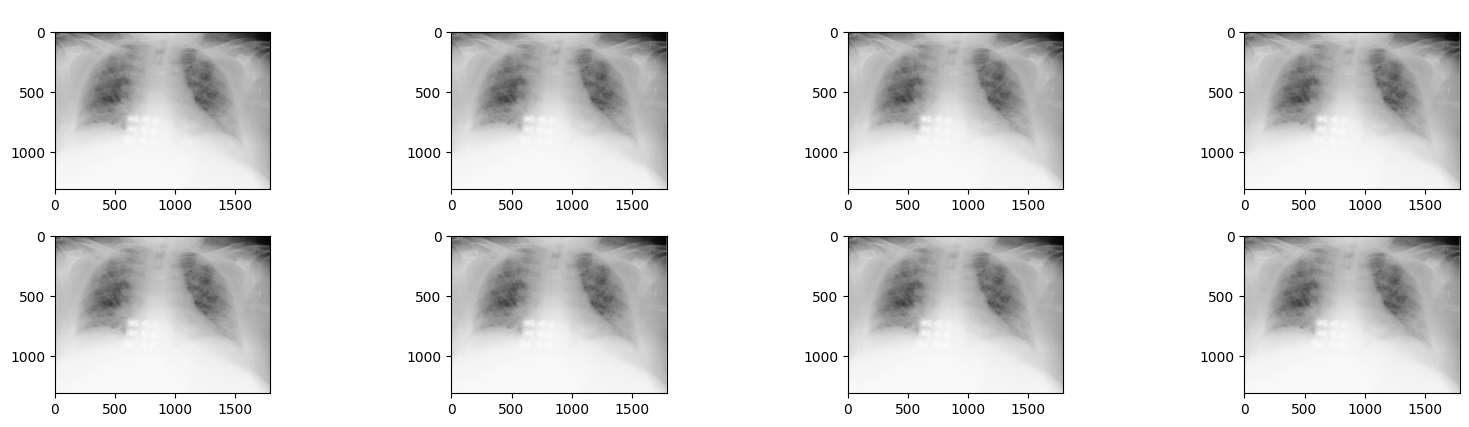

In [40]:
# Vamos a visualizar algunas imágenes del conjunto de datos en una cuadrícula 4x4
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg

fig = plt.figure(1, figsize=(20, 10))
# Creamos un array de cuadrículas dividiendo la figura en una matriz 4x2
gs = gridspec.GridSpec(4, 4, figure=fig, hspace=0.3, wspace=0.1)
# Arrays con las 4 primeras imágenes de pacientes COVID y sujetos con condición normal
# Fixed: Removed the extra 'positivo' from the path as it's already in train_covid_dir
covid_pics = [op.join(train_covid_dir, filename) for filename in train_covid_names[0:4]]
# Fixed: Removed the extra 'negativo' from the path as it's already in train_normal_dir
normal_pics = [op.join(train_normal_dir, filename) for filename in train_normal_names[0:4]]
# Combinamos ambos conjuntos
merger_pics = covid_pics + normal_pics

for i, pic_path in enumerate(merger_pics):
  ax = fig.add_subplot(gs[i])
  # Obtenemos los datos de la imagen (píxeles) con la función imread
  pic_data = mpimg.imread('/content/Datos/datasets/datasets/train/positive/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')
  # Representamos en escala de grises los datos de imagen con la función imshow
  ax.imshow(pic_data, cmap='gray')
  # Añadimos un título a cada cuadrícula de la figura que hace referencia al
  # nombre del archivo de imagen
  if i < 4:
    ax.set_title('POSITIVO_%s' % i, color='white')
  else:
    ax.set_title('NEGATIVO_%s' % i, color='white')


# Mostramos la figura
plt.show()

In [41]:
#buscar una imagen en las carpetas del dataset
import os

img_folder = '/content/Datos'  # o reemplaza con la ruta que tú creas que es
for root, dirs, files in os.walk(img_folder):
    for file in files:
        if file.endswith('.jpeg') and '01E392EE' in file:
            print(os.path.join(root, file))

/content/Datos/datasets/datasets/train/positive/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg


# Pre Procesado y aumento de datos

In [42]:
# Generamos los lotes de entrenamiento, evaluación y validación
dgen_train = ImageDataGenerator(rescale=1./255,
                                validation_split=0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_test = ImageDataGenerator(rescale=1./255)
dgen_val = ImageDataGenerator(rescale=1./255)
# Sobre cada grupo aplicamos una renormalización para que los datos estén
# en el intervalo 0-1 (el valor máximo de intensidad es 255)
# Sobre el conjunto de entrenamiento aplicamos métodos de aumento de datos
# zoom_range -> porcentaje máximo de zoom sobre la imagen
# horizontal_flip -> aplicar desplazamiento horizontal

# Creamos los generadores de lotes conteniendo el 80% de las imágenes en el
# grupo de entrenamiento y el 20% restante en el de validación
train_generator = dgen_train.flow_from_directory(train_dir,
                                           target_size=(150, 150),
                                           subset = 'training',
                                           batch_size = 32,
                                           class_mode = 'binary')
# Target size -> redimensiona las imágenes para que se acomoden en un tamaño de 150x150 píxeles
# Mode -> especifica que estos datos se utilizarán en la fase de entrenamiento
# batch_size -> número de imágenes que cargaremos en memoria en cada paso del proceso de aprendizaje
# class_mode -> binary para clasificación dicotómica (COVID / Normal), categorical para identificar etiquetas

val_generator = dgen_train.flow_from_directory(train_dir,
                                           target_size=(150, 150),
                                           subset = 'validation',
                                           batch_size = 32,
                                           class_mode = 'binary')

test_generator = dgen_train.flow_from_directory(test_dir,
                                           target_size=(150, 150),
                                           batch_size = 32,
                                           class_mode = 'binary')


Found 541 images belonging to 2 classes.
Found 135 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


In [43]:
#verificar clases
train_generator.class_indices

{'negative': 0, 'positive': 1}

In [44]:
# Veámos también cuál es el tamaño de la muestra para el entrenamiento del modelo
train_generator.image_shape
# El tamaño de las imágenes es 150x150 y el valor de dimensión tres nos indica que las imágenes
# están en formato RGB, donde el color de cada pixel es una combinación de rojo+verde+azul

(150, 150, 3)

# Construcción red neuronal convolucional

In [45]:
# En este punto ya podemos definir nuestro modelo de RN convolucional que aprenderá
# de los datos agrupados que hemos trabajado anteriormente
# Construiremos el modelo añadiendo capas a una instancia de la clase Sequencial

model = Sequential()

# La primera capa que utilizaremos para extraer caracterísiticas de la imagen es
# una capa de convolución que aplica filtros formados por pequeños cuadrados que
# mapean la imagen de entrada. Seleccionaremos 32 características a extraer
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='SAME', activation='relu', input_shape=(150, 150, 3)))
# Añadimos la capa Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# Capa Dropout que
model.add(Dropout(0.5))

# Vamos a añadir una segunda capa de convolución
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='SAME', activation='relu'))
# Y las sucesivas capas de Pooling y Dropout
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Ahora podemos añadir la capa Flatten
model.add(Flatten())

# La capa densamente conexa en la que especificamos los nodos y el
# tipo de activiación
model.add(Dense(256, activation='relu'))

# Añadirmos una nueva operación Dropout que reduce a la mitad el número de nodos
model.add(Dropout(0.5))

# Y finalemente conectamos los nodos para crear la salida con un único nodo
# Dado que estamos ante un problema de clasificación usaremos la función de activación
# sigmoidea
model.add(Dense(1, activation='sigmoid'))

# Resumen del modelo
print("Resumen del modelo:\n", model.summary())
# En este resumen vemos que el tamaño del primer tensor tiene valor None porque
# se refiere a la dimensionalidad del tamaño de lote, que puede tomar cualquier valor
# que mejor modelo produzca

# Tras la aplicación de la capa de convolución tenemos un tensor de dimensión igual a
# la mitad de la imagen de entrada y con 32 características en el eje z

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,429,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,483,905 (85.77 MB)

 Trainable params: 22,483,905 (85.77 MB)

 Non-trainable params: 0 (0.00 B)

Resumen del modelo:
 None


# Compilar y Entrenar el Modelo

In [48]:
# Para compilar nuestro modelo de RNC tendremos que:
# 1) Definir el método de optimización (Adam)
# 2) El valor para el learning_rate
# 3) La función de pérdidad: bynary cross entropy es una buena elección para una tarea de clasificación binaria
# 4) La métrica de evaluación: utilizaremos accuracy
from tensorflow.keras.optimizers import Adam

model.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
# Compilado el modelo podemos lanzar el proceso de entrenamiento
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=val_generator)
# El objeto history registra el progreso durante el entrenamiento, recoge el valor de la función de pérdida
# y la métrica de evaluación en cada paso del proceso

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 70s 4s/step - accuracy: 0.7012 - loss: 2.8286 - val_accuracy: 0.8148 - val_loss: 0.6449
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 66s 4s/step - accuracy: 0.8366 - loss: 0.4964 - val_accuracy: 0.8148 - val_loss: 0.4889
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.8345 - loss: 0.4134 - val_accuracy: 0.8148 - val_loss: 0.4390
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.8088 - loss: 0.3847 - val_accuracy: 0.8593 - val_loss: 0.4368
Epoch 5/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.8381 - loss: 0.3366 - val_accuracy: 0.8593 - val_loss: 0.3593
Epoch 6/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.8494 - loss: 0.3455 - val_accuracy: 0.8815 - val_loss: 0.3481
Epoch 7/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step - accuracy: 0.8841 - loss: 0.2957 - val_accuracy: 0.8519 - val_loss: 0.3787
Epoch 8/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 62s 4s/step - accuracy: 0.9038 - loss: 0.2493 - val_accuracy: 0.9185 - val_loss:

**Evaluación del desempeño**

In [50]:
# Veámos que los valores de loss y accuracy se han almacenado en history
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 0, 'época')

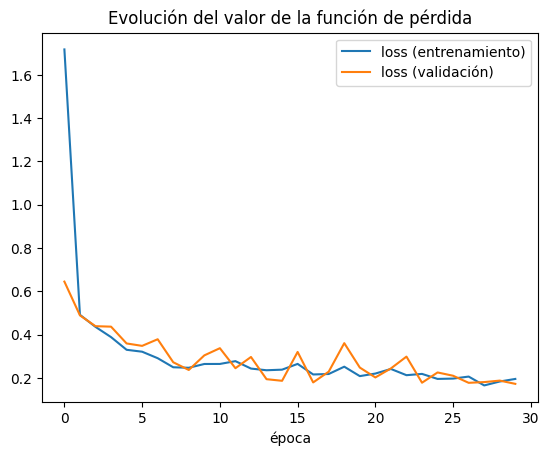

In [51]:
# Para evaluar el rendimiento del modelo representamos los valores de las métricas de interés en función de la
# época del entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss (entrenamiento)', 'loss (validación)'])
plt.title("Evolución del valor de la función de pérdida")
plt.xlabel('época')

Text(0.5, 0, 'época')

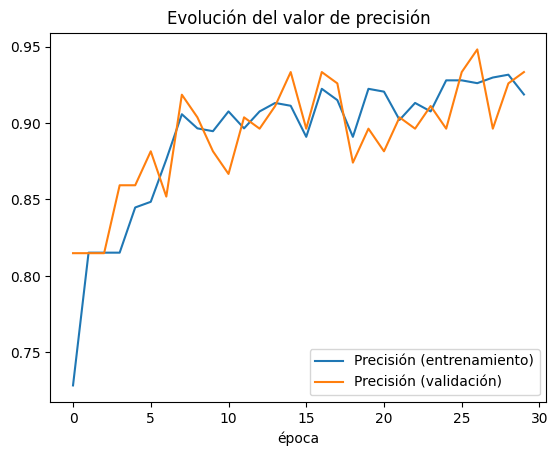

In [52]:
# Un vistazo a la evolución de la precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Precisión (entrenamiento)', 'Precisión (validación)'])
plt.title("Evolución del valor de precisión")
plt.xlabel('época')

In [53]:
# Por último, validamos el modelo sobre la muestra de evaluación
test_loss, test_accuracy = model.evaluate(test_generator)
# Simplemente tenemos que evaluar el modelo que acabamos de entrenar sobre el conjunto de datos que habíamos
# reservado para la evaluación
print("\n=> Resultados sobre el conjunto de pruebas:")
print(" - Loss: {:.2f}, Accuracy: {:.2f} ".format(test_loss, test_accuracy))

13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.8319 - loss: 0.6553

=> Resultados sobre el conjunto de pruebas:
 - Loss: 0.57, Accuracy: 0.85 


**Resultados (predicciones) sobre datos no vistos**

In [55]:
# En esta última acción evaluaremos nuestro modelo sobre nuevas imágenes
# de radiografías torácicas para obtener un resultado (predicción) para el
# paciente: infección COVID o sano
from google.colab import files
from keras.preprocessing import image
from PIL import Image
uploads = files.upload()
for filename in uploads.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size=(150, 150))
  data = image.img_to_array(img)
  data = np.expand_dims(data, axis=0)
  prediction = model.predict(data)
  print("\nImagen Rayos-X:", filename)

  if prediction == 0:
    print(" => Detectado COVID-19")
  else:
    print(" => Estado normal")

